# Introduction 

Geospatial data analysis involves studying geography, maps, and spatial relationships to derive insights from data that has a location component. It helps understand and interpret information tied to specific places, like cities or buildings. For instance, it aids city planners in identifying optimal park locations by analyzing green space availability and foot traffic. Similarly, it enables tracking disease spread using location-based data. Geospatial analysis empowers organizations to make informed decisions using geographic and location-based data. This article explores how to perform data analysis on geospatial information.

## Learning Objectives

- Significance of geospatial data in various fields and industries.
- Process of cleaning, transforming, and preprocessing geospatial data.
- How to create interactive maps and visualizations using geospatial data?
- Describe the challenges of integrating geospatial data with other data sources.
- Provide real-world examples of how geospatial data analysis is used in data science.
- How to perform geospatial data analysis using the Python programming language?



## What is Geospatial Data? 

Geospatial data refers to information that is tied to specific geographic locations on the Earth’s surface. It includes data such as coordinates, addresses, maps, satellite imagery, and any other data with spatial references. Geospatial data enables analysis, visualization, and understanding of the spatial relationships, patterns, and attributes of features and phenomena in the real world.

## What is Geospatial Data Analysis?

Geospatial data analysis is a type of data analysis that focuses on the study and exploration of geographical data. It involves using geographical information to understand patterns, relationships, and trends between different spatial features and attributes. Geospatial data analysis can answer various questions, such as where certain phenomena are more likely to occur, how human activities affect the environment, and the distribution of certain population groups. Geospatial data analysis involves collecting, cleaning, and transforming geospatial data, creating maps and visualizations, and conducting statistical analysis to identify patterns and relationships.

## Collecting and Preprocessing

Collecting and preprocessing geospatial data is a crucial step in geospatial data analysis. This involves collecting data from various sources, such as satellite imagery, GPS, and GIS systems, and converting it into the correct format that can be analyzed and visualized. Preprocessing involves cleaning, transforming, and integrating the data to ensure it is in a consistent and usable format. This step is important as it lays the foundation for accurate and meaningful analysis and visualizations. It also involves defining the coordinate reference system, which provides a standard frame of reference for the data and helps make accurate spatial comparisons. The analyst can make informed decisions and draw meaningful insights from the data by properly preprocessing geospatial data.

## Visualising Geospatial Data Using Mapping Tools and Techniques

When it comes to visualizing geospatial data, there are several tools and techniques available that data scientists can use. Some of the most common ones include:

- `GIS (Geographic Information Systems) software:` This is a type of software that is designed for analyzing and visualizing geospatial data. Examples of popular GIS software include ArcGIS, QGIS, and ESRI.
- `Mapping libraries and frameworks`: Several mapping libraries and frameworks are available for visualizing geospatial data in various programming languages, such as Python and JavaScript. Some popular examples include Folium (Python), Leaflet (JavaScript), and Mapbox GL JS.
- `Heat maps and density plots`: These visualizations allow you to see data distribution across a geographic area. Heat maps use color to represent data density, while density plots use contour lines to show the same information.
- `Choropleth maps`: Choropleth maps use color shading to represent data values within defined geographic regions. These can be used to show data distribution across countries, states, or any other type of geographic boundary.
- `Point maps`: Point maps are a type of visualization that uses markers to represent data points at specific geographic locations. These can show the location of individual incidents, such as accidents or crimes.


Using these tools and techniques, data scientists can effectively visualize and analyze geospatial data, leading to valuable insights and informed decision-making.

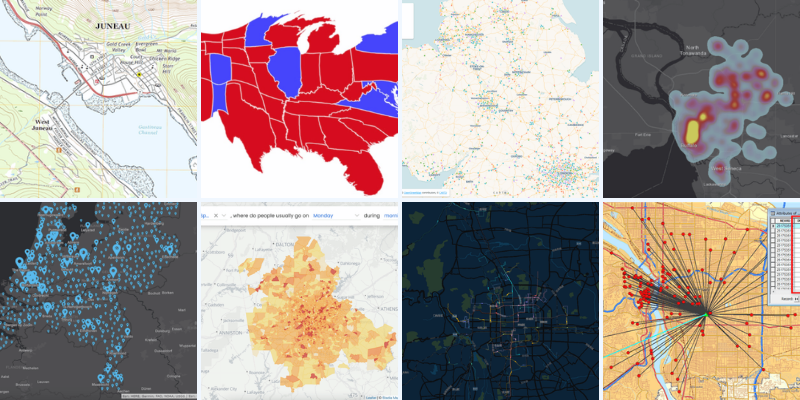


## Spatial Data Analysis Techniques and Algorithms

Spatial data analysis involves evaluating and modeling geographical or spatially referenced data. Some of the commonly used techniques and algorithms in this field include:


1.  `Spatial Interpolation (Kriging, IDW)`: These techniques estimate values for unknown locations based on known values.

2. `Spatial Regression (OLS, GWR, GLM)`: These methods are used to model the relationships between variables in space.

3. `Spatial Clustering (K-Means, Hierarchical Clustering, DBSCAN)`: These techniques are used to partition data into clusters based on similarity and identify dense clusters and noise points.

4. `Spatial Classification`: This method involves assigning categories or labels to geographical or spatial data based on its attributes or characteristics.

5. `Spatial Autocorrelation Analysis`: This technique is used to evaluate the relationship between the values of the same attribute in neighboring areas.


## Use Cases and Applications of Geospatial Data Analysis in Data Science

1. `Urban Planning`: Geospatial data analysis models and understands urban growth patterns, land use changes, and housing developments.

2. `Environmental Monitoring:` Spatial analysis monitors environmental phenomena, such as land cover changes, soil erosion, and deforestation.


3. `Natural Resource Management`: Spatial data is used to manage and conserve natural resources, such as water, forests, and minerals, and to monitor the effects of human activities on the environment.

4. `Transportation Planning`: Geospatial data analysis is used to model transportation networks and improve transportation planning, including roads, public transit, and bike lanes.

5. `Disaster Management`: Spatial data analysis is used to respond to natural disasters, such as hurricanes, earthquakes, and wildfires, by providing information on the location and extent of the damage.

6. `Market Segmentation`: Geospatial data analysis is used to segment markets based on location and demographics, allowing companies to target their marketing efforts effectively.

7. `Agriculture`: Spatial data analysis supports precision agriculture, which uses technology to optimize crop yields and reduce waste.

8. `Crime Analysis`: Spatial data analysis is used by law enforcement agencies to analyze crime patterns and allocate resources more effectively.


## Geospatial Data Analysis with Python Implementation

Let us perform a basic geospatial Data analysis with python implementation on a dataset from Kaggle.

### Dataset Description

This dataset identifies hazardous areas for driving according to harsh braking and accident-level events within a specific area. Each month a new set of dangerous driving areas is produced and encapsulates one year of rolling data (i.e., from the previous month back 1 year). Associated with each area is a severity score based on the frequency of occurrences and the severity of said occurrences. Data is aggregated over the previous 12 months.


### Data

Some variables to point out:

    `SeverityScore`: Severity score for each area as the number of harsh braking incidents and accident-level incidents for every 100 units of traffic flow. Traffic flow is defined as the total hourly vehicle volume in the geohash.
    `IncidentsTotal`: The total number of harsh braking incidents and accident-level events that have occurred within the geohash

`Note`: To perform geospatial analysis using the geopy library, you would require a laptop with graphics for better use. If you do not have one would recommend you use google collab with GPU enabled in the runtime type. For demonstration, I would be using collab to perform the geospatial analysis.


In [ ]:
#importing required Libraries
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset

#store the data into a data frame

data = pd.read_csv("Hazardous_driving_areas.csv")

# Read the First five rows in the dataset
print(data.head())
#Check the size of the dataset
print(data.shape)

# Check for duplicate entries

duplicate_rows = data.duplicated().sum()
print(f"duplicate rows = {duplicate_rows}")

o/p--> duplicate rows = 0

# check for missing values

data.isnull().sum()

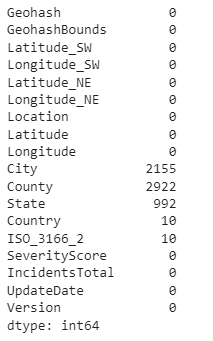

We can see that city, county, state, ISO_3166_2, and country variables have a significant number of missing values.

# for any given latitude and location, we can derive the country using the geopy library

# For example

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
def get_location_info(lat, long):
location = geolocator.reverse(f"{lat}, {long}", exactly_one=True)
address = location.raw['address']
country = address.get('country', '')
return country
lat = 49.024
long = -123.155
country = get_location_info(lat, long)
print(f"country: {country}")

In [ ]:
# Create an instance of the Nominatim geolocator
geolocator = Nominatim(user_agent="geoapiExercises")
# Impute the missing values for the Country column
for index, row in data.iterrows():
    if pd.isna(row['Country']):
        location = geolocator.reverse(f"{row['Latitude']}, {row['Longitude']}", exactly_one=True)
        data.at[index, 'Country'] = location.raw['address']['country']
print(f"missing values in country Variable :{data.Country.isnull().sum()}")

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

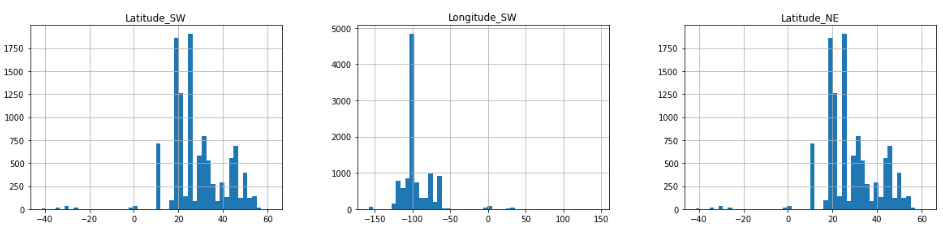

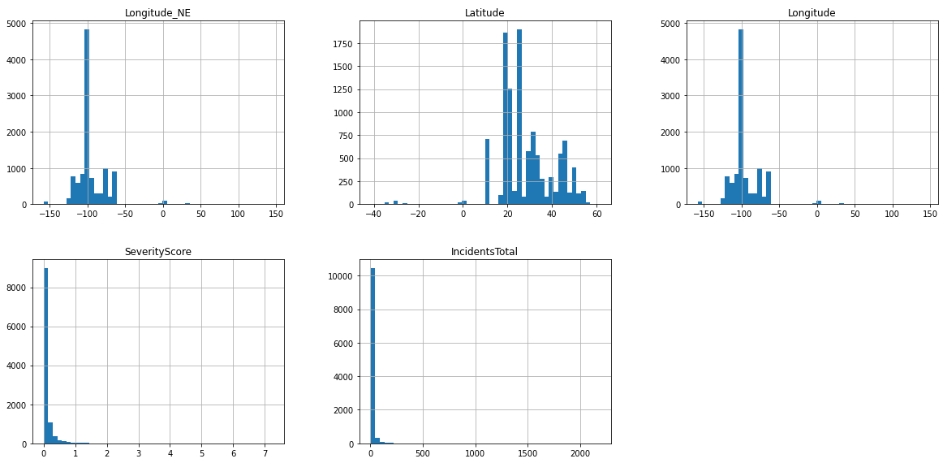

In [ ]:
# Let us plot a heat map
# Create a correlation matrix
corr_matrix = df.corr()
# Plot the heatmap
sns.heatmap(corr_matrix,annot=True)
plt.show()

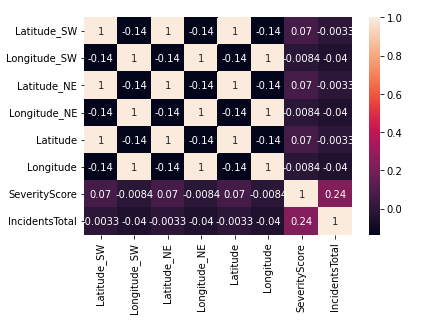